In [1]:
import numpy as np
import timeit

from scipy.sparse import identity
from graspologic.inference import latent_position_test
from graspologic.embed import AdjacencySpectralEmbed, LaplacianSpectralEmbed
from graspologic.simulations import er_np, sbm, rdpg
from graspologic.utils import symmetrize
from graspologic.plot import heatmap, pairplot
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

from sknetwork.data import erdos_renyi, painters, movie_actor
from sknetwork.embedding import Spectral, SVD
from sknetwork.visualization import svg_graph, svg_digraph, svg_bigraph
from IPython.display import SVG

Sim setting:

Sim 1: SVD vs ASE

Generate a scipy csr_matrix with an nxn identity matrix (n=100)
Perform ASE and SVD on the graph (with same n_components) and save the runtimes for each using the timeit.default_timer() method
Repeat step 2 increasing n by 100 until n=2000
Plot line graphs for times vs n_verts for ASE and SVD
Sim 2: Spectral vs LSE
Exact same process as sim 1 except use spectral instead of SVD and LSE instead of ASE

In [30]:
n_verts = [10, 100, 1000, 10000, 100000, 1000000]
total_verts = []
time_ASE = []
time_SVD = []

In [31]:
for n in n_verts:
    for _ in range(15):
        
        total_verts.append(n)
        A = identity(n, format='csr')
        
        #get time for running ASE
        start_time = timeit.default_timer()
        ase = AdjacencySpectralEmbed(n_components=2)
        X1 = ase.fit_transform(A)
        elapsed_ASE = timeit.default_timer() - start_time
        time_ASE.append(elapsed_ASE)
        
        #get time for running SVD
        start_time = timeit.default_timer()
        svd = SVD(2)
        X2 = svd.fit_transform(A)
        elapsed_SVD = timeit.default_timer() - start_time
        time_SVD.append(elapsed_SVD)
        
        print(n)

/Users/kareefullah/Desktop/Graspy_Workspace/graspologic/graspologic/embed/ase.py:166: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/Users/kareefullah/Desktop/Graspy_Workspace/graspologic/graspologic/embed/ase.py:175: RuntimeWarning: divide by zero encountered in true_divide
  inv_eigs = np.diag(1 / self.singular_values_)
/Users/kareefullah/Desktop/Graspy_Workspace/graspologic/graspologic/embed/ase.py:176: RuntimeWarning: invalid value encountered in matmul
  self._pinv_left = self.latent_left_ @ inv_eigs


10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
100000
100000
100000
100000
100000
100000
100000
100000
100000
100000
100000
100000
100000
100000
100000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000


In [32]:
time_ASE_dict = {"time_ASE": time_ASE, "n_verts": total_verts}
df_ASE = pd.DataFrame(data = time_ASE_dict)

In [33]:
time_SVD_dict = {"time_SVD": time_SVD, "n_verts": total_verts}
df_SVD = pd.DataFrame(data = time_SVD_dict)

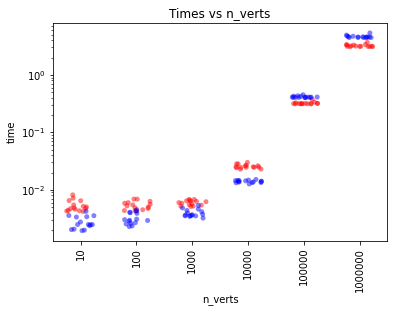

In [34]:
ax1 = sns.stripplot(data=df_ASE,
    x="n_verts",
    y="time_ASE",
    jitter = 0.25,
    alpha = 0.5,
    size=5,
    color='red'
)

ax2 = sns.stripplot(data=df_SVD,
    x="n_verts",
    y="time_SVD",
    jitter = 0.25,
    alpha = 0.5,
    size=5,
    color='blue'
)
ax1.set_yscale('log')
plt.xticks(rotation='vertical')
plt.ylabel('time')
plt.title("Times vs n_verts")

plt.savefig('timeASESVD_vs_n_verts.png')

In [25]:
n_verts = [10, 100, 1000, 10000]
total_verts = []
time_LSE = []
time_Spectral = []

In [26]:
for n in n_verts:
    for _ in range(15):
        
        total_verts.append(n)
        A = identity(n, format='csr')
        
        #get time for running LSE
        start_time = timeit.default_timer()
        lse = LaplacianSpectralEmbed(n_components=2)
        X1 = lse.fit_transform(A)
        elapsed_LSE = timeit.default_timer() - start_time
        time_LSE.append(elapsed_LSE)
        
        #get time for running Spectral
        start_time = timeit.default_timer()
        spectral = Spectral(2)
        X2 = spectral.fit_transform(A)
        elapsed_Spectral = timeit.default_timer() - start_time
        time_Spectral.append(elapsed_Spectral)
        
        print(n)

10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000


In [27]:
time_LSE_dict = {"time_LSE": time_LSE, "n_verts": total_verts}
df_LSE = pd.DataFrame(data = time_LSE_dict)

In [28]:
time_Spectral_dict = {"time_Spectral": time_Spectral, "n_verts": total_verts}
df_Spectral = pd.DataFrame(data = time_Spectral_dict)

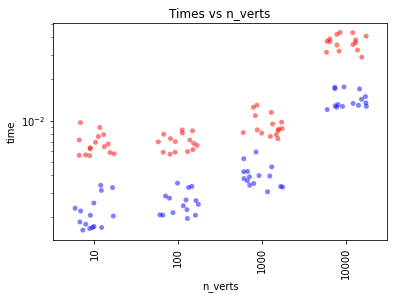

In [29]:
ax1 = sns.stripplot(data=df_LSE,
    x="n_verts",
    y="time_LSE",
    jitter = 0.25,
    alpha = 0.5,
    size=5,
    color='red'
)

ax2 = sns.stripplot(data=df_Spectral,
    x="n_verts",
    y="time_Spectral",
    jitter = 0.25,
    alpha = 0.5,
    size=5,
    color='blue'
)
ax1.set_yscale('log')
plt.xticks(rotation='vertical')
plt.ylabel('time')
plt.title("Times vs n_verts")

plt.savefig('timeLSESpectral_vs_n_verts.png')